In [1]:
from keras.datasets import reuters

Using TensorFlow backend.


In [2]:
(train_data, train_labels),(test_data, test_labels) = reuters.load_data(num_words=10000)

In [3]:
len(train_data)

8982

In [4]:
len(test_data)

2246

In [5]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value,key) for (key, value) in word_index.items()])
decoded_newswire = ''.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])

In [6]:
train_labels[10]

3

In [7]:
decoded_newswire

'???saidasaresultofitsdecemberacquisitionofspacecoitexpectsearningspersharein1987of115to130dlrspershareupfrom70ctsin1986thecompanysaidpretaxnetshouldrisetonineto10mlndlrsfromsixmlndlrsin1986andrentaloperationrevenuesto19to22mlndlrsfrom125mlndlrsitsaidcashflowpersharethisyearshouldbe250tothreedlrsreuter3'

**Preparing the data**

In [13]:
# Encoding the data
import numpy as np

def vectorize_sequences(sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results


In [14]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [9]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [19]:
# Model definition
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [20]:
# compiling the model
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [22]:
# setting aside a validation set
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]


In [23]:
# training the model
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val,y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 308us/step - loss: 2.4997 - acc: 0.4899 - val_loss: 1.6813 - val_acc: 0.6480
Epoch 2/20
7982/7982 [==============================] - 2s 230us/step - loss: 1.3911 - acc: 0.7040 - val_loss: 1.2781 - val_acc: 0.7170
Epoch 3/20
7982/7982 [==============================] - 2s 231us/step - loss: 1.0482 - acc: 0.7699 - val_loss: 1.1177 - val_acc: 0.7630
Epoch 4/20
7982/7982 [==============================] - 2s 242us/step - loss: 0.8243 - acc: 0.8276 - val_loss: 1.0221 - val_acc: 0.7780
Epoch 5/20
7982/7982 [==============================] - 2s 224us/step - loss: 0.6596 - acc: 0.8638 - val_loss: 0.9705 - val_acc: 0.7950
Epoch 6/20
7982/7982 [==============================] - 2s 221us/step - loss: 0.5250 - acc: 0.8940 - val_loss: 0.9205 - val_acc: 0.8110
Epoch 7/20
7982/7982 [==============================] - 2s 222us/step - loss: 0.4289 - acc: 0.9109 - val_loss: 0.9118 - val_acc: 0.8040


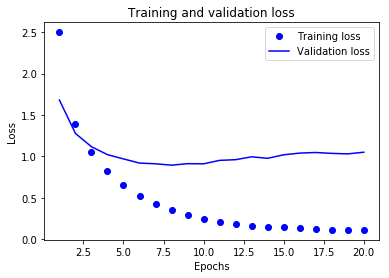

In [26]:
#plotting the training and validation loss
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title("Training and validation loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

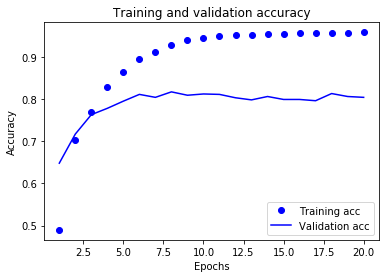

In [28]:
# plotting the training and validation accuracy

plt.clf

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [32]:
# Retraining a model from scratch

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics = ['accuracy'])
model.fit(partial_x_train, partial_y_train, epochs=9, batch_size=512, validation_data=(x_val, y_val))

result = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 2s 295us/step - loss: 2.5370 - acc: 0.5165 - val_loss: 1.7039 - val_acc: 0.6250
Epoch 2/9
7982/7982 [==============================] - 2s 215us/step - loss: 1.4389 - acc: 0.6943 - val_loss: 1.3625 - val_acc: 0.7040
Epoch 3/9
7982/7982 [==============================] - 2s 229us/step - loss: 1.0867 - acc: 0.7657 - val_loss: 1.1767 - val_acc: 0.7460
Epoch 4/9
7982/7982 [==============================] - 2s 228us/step - loss: 0.8450 - acc: 0.8196 - val_loss: 1.0579 - val_acc: 0.7750
Epoch 5/9
7982/7982 [==============================] - 2s 233us/step - loss: 0.6767 - acc: 0.8571 - val_loss: 0.9977 - val_acc: 0.7810
Epoch 6/9
7982/7982 [==============================] - 2s 219us/step - loss: 0.5326 - acc: 0.8899 - val_loss: 0.9606 - val_acc: 0.7950
Epoch 7/9
7982/7982 [==============================] - 2s 220us/step - loss: 0.4256 - acc: 0.9129 - val_loss: 0.9113 - val_acc: 0.8180
Epoch 8

In [33]:
result

[1.0021692787231553, 0.7862867319944812]

In [35]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hits_array))/len(test_labels)

0.182546749777382

In [36]:
predictions = model.predict(x_test)

In [37]:
predictions[0].shape

(46,)

In [38]:
np.sum(predictions[0])

0.9999999

In [39]:
np.argmax(predictions[0])

3

In [46]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)